In [1]:
from front.dag import crudify_func_nodes
from streamlitfront.examples import simple_ml_1 as sml


<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
/Users/sylvain/opt/anaconda3/envs/otopy38/lib/python3.8/site-packages/paramiko/transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,
OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [2]:
audio_func = sml.audio_anomalies

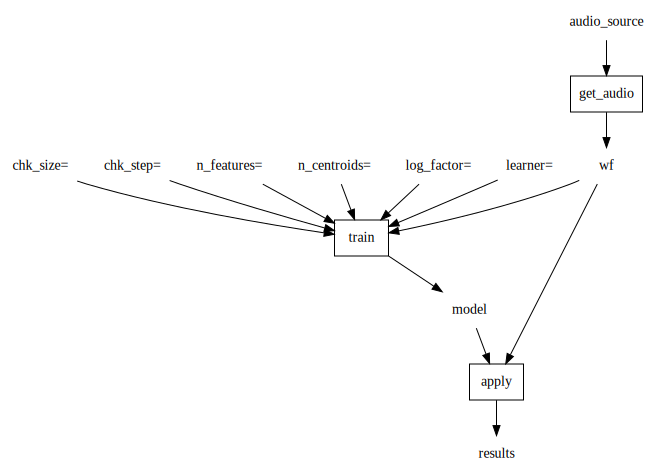

In [3]:
audio_func.dot_digraph()

In [1]:
from recode import decode_wav_bytes
from pathlib import Path
from operator import methodcaller, itemgetter
import numpy as np
from i2 import include_exclude
from i2 import Pipe
from streamlitfront.examples import simple_ml_1 as sml


from plunk.sb.front_demo.user_story1.utils.funcs import (
    learn_apply_model,
    upload_sound,
)
from meshed import code_to_dag

file_to_bytes = Pipe(Path, methodcaller('read_bytes'))
wav_file_to_array = Pipe(
    file_to_bytes, decode_wav_bytes, itemgetter(0), np.array, np.transpose, itemgetter(0)
)

def get_sound(audio_source, tag):
    return upload_sound(audio_source, "")[0]

@code_to_dag
def audio_anomalies():
    wf = get_audio(audio_source)
    model = train(learner, wf)
    results = apply(model, wf)

audio_anomalies = audio_anomalies.ch_funcs(
    #get_audio=lambda audio_source: wav_file_to_array(audio_source),
    get_audio = get_sound,
#     train=lambda wf, learner: auto_spectral_anomaly_learner(wf, learner=learner),
#     train=auto_spectral_anomaly_learner,
    train=include_exclude(sml.auto_spectral_anomaly_learner, include='wf learner', exclude=''),
    apply=lambda model, wf: model.score_samples(wf)
)

filepath = '/Users/sylvain/Dropbox/_odata/sound/guns/Sub-Machine Gun 9mm Long Burst 01.wav'
#filepath = '/Users/sylvain/Dropbox/Otosense/VacuumEdgeImpulse/train/noise.AirConditioner_2.9.1440000-1600000.wav.23q8e34o.ingestion-6bc8b65f8c-vrv59.wav'

wf = wav_file_to_array(filepath)

from omodel.outliers.pystroll import OutlierModel

results = audio_anomalies(filepath, learner=OutlierModel(n_centroids=5))
results.shape

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
/Users/sylvain/Desktop/dev/otosense/odat/odat/mdat/iatis.py:34: UserWarning: You don't have the myconfigs['oto.ini']['s3_all_ro'], which I need to be able to access s3. This means you won't be able to access the audio data.
  warn("You don't have the myconfigs['oto.ini']['s3_all_ro'], which I need to be able to access s3. "
/Users/sylvain/opt/anaconda3/envs/otopy38/lib/python3.8/site-packages/paramiko/transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,
OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


NameError: name 'sml' is not defined

In [9]:
wf

array([-2636, -2914, -3625, ...,    32,   111,   107])